In [1]:
'''
Clustering: Hierarchical 
Dataset : 50_Startups.csv 
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply Hierarchical clustering algorithms (based on PROFIT column) to find the group of start-ups. 
'''

'\nClustering: Hierarchical \nDataset : 50_Startups.csv \nApply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. Apply Hierarchical clustering algorithms (based on PROFIT column) to find the group of start-ups. \n'

In [3]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data = pd.read_csv(r'LP-1_Dataset\K-Means & Hirarchical Clustering\50_Startups.csv')

data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.isnull().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
data.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')

In [10]:
scaler = StandardScaler()
data[['RND', 'ADMIN', 'MKT', 'PROFIT']] = scaler.fit_transform(data[['RND', 'ADMIN', 'MKT', 'PROFIT']])

In [11]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,2.016411,0.560753,2.153943,New York,2.011203
1,1.955860,1.082807,1.923600,California,1.999430
2,1.754364,-0.728257,1.626528,Florida,1.980842
3,1.554784,-0.096365,1.422210,New York,1.776627
4,1.504937,-1.079919,1.281528,Florida,1.357740


In [12]:
X = data[['RND', 'ADMIN', 'MKT', 'PROFIT']]

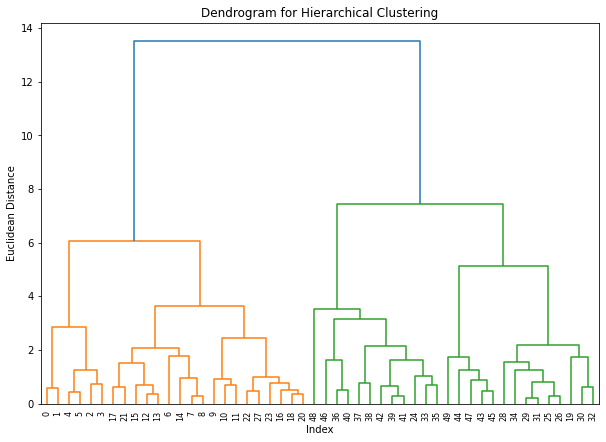

In [14]:
plt.figure(figsize=(10, 7))
dendrogram = dendrogram(linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

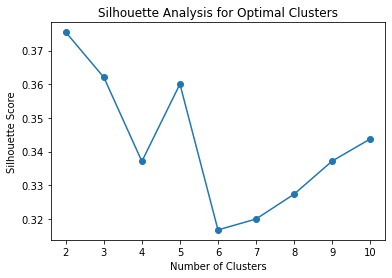

In [16]:
range_n_cluster = range(2, 11)
silhouette_avg_scores = []
for n_clusters in range_n_cluster:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)

plt.plot(range_n_cluster, silhouette_avg_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=2)
data['Cluster'] = hierarchical_clustering.fit_predict(X)

In [31]:
data.head()

,RND,ADMIN,MKT,STATE,PROFIT,Cluster
0,2.016411,0.560753,2.153943,New York,2.011203,1
1,1.955860,1.082807,1.923600,California,1.999430,1
2,1.754364,-0.728257,1.626528,Florida,1.980842,1
3,1.554784,-0.096365,1.422210,New York,1.776627,1
4,1.504937,-1.079919,1.281528,Florida,1.357740,1


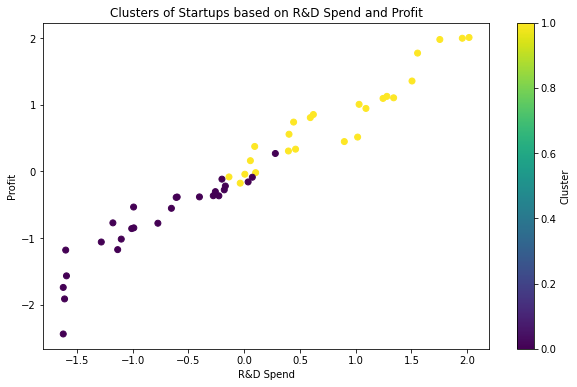

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(data['RND'], data['PROFIT'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Startups based on R&D Spend and Profit')
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.colorbar(label='Cluster')
plt.show()

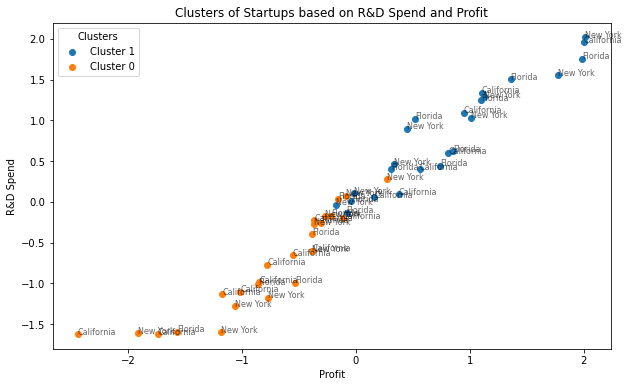

In [35]:
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PROFIT'], 
                cluster_data['RND'], 
                label=f"Cluster {cluster}")

for i, state in enumerate(data['STATE'])    :
    plt.annotate(state, (data['PROFIT'][i], data['RND'][i]), fontsize=8, alpha=0.6)
    
plt.xlabel('Profit')
plt.ylabel('R&D Spend')
plt.legend(title='Clusters')
plt.title('Clusters of Startups based on R&D Spend and Profit')
plt.show()